In [1]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

In [30]:
data_train = pd.read_csv("./Train.csv")

In [31]:
#定义操作函数
from sklearn.ensemble import RandomForestRegressor
def set_missing_ages(df):

    #提取已有的数值型特征拿出来丢入随机森林
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]

    #将已知、未知年龄分开
    known_age = age_df[age_df.Age.notnull()].values     #将pd转成矩阵
    unknown_age = age_df[age_df.Age.isnull()].values

    # y即label
    y = known_age[:, 0]

    # X特征属性
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1:])

    # 用得到的预测年龄去填补年龄
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges    #loc函数，第一个参数表示第几行，第二个表示第几列

    return df, rfr

#填补Cabin
def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()), 'Cabin'] = 'No'
    return df

#特征因子化
def factorization(df):
    dummies_Cabin = pd.get_dummies(df['Cabin'], prefix= 'Cabin')
    dummies_Embarked = pd.get_dummies(df['Embarked'], prefix='Embarked')
    dummies_Sex = pd.get_dummies(df['Sex'], prefix= 'Sex')
    dummies_Pclass = pd.get_dummies(df['Pclass'], prefix= 'Pclass')
    df = pd.concat([df,dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
    df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace = True)
    return df

In [32]:
#处理缺失非常规特征
data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_train = factorization(data_train)

In [33]:
#处理幅度变化大的特征
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
data_train['Age_scaled'] = scaler.fit_transform(data_train['Age'].values.reshape(-1,1))     #fit_transform、fit、transform
data_train['Fare_scaled'] = scaler.fit_transform(data_train['Fare'].values.reshape(-1,1))

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


In [56]:
data_train_filter = data_train.filter(regex = 'Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
data_train_filter_np = data_train_filter.values
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier
#lg模型及训练
clf = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
clf.fit(data_train_filter_np[:, 1:], data_train_filter_np[:, 0])
#bg模型及训练
bagging_clf = BaggingClassifier(clf, n_estimators=20, max_samples=0.9, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(data_train_filter_np[:, 1:], data_train_filter_np[:, 0])

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=1e-06,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.9, n_estimators=20, n_jobs=-1, oob_score=False,
                  random_state=None, ve

In [42]:
###处理test数据集
data_test = pd.read_csv("./test.csv")
data_test.loc[(pd.isnull(data_test['Fare'])), 'Fare'] = 0

#补全空缺的年龄信息
tmp_df  = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values
pre_age = rfr.predict(null_age[:, 1:])
data_test.loc[(pd.isnull(data_test['Age'])), 'Age'] = pre_age
#处理其他信息
data_test = set_Cabin_type(data_test)
data_test = factorization(data_test)
data_test['Age_scaled'] = scaler.fit_transform(data_test['Age'].values.reshape(-1,1))
data_test['Fare_scaled'] = scaler.fit_transform(data_test['Fare'].values.reshape(-1,1))
data_test

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.034018,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337609,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944790,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


In [45]:
#预测输出
data_test_filter = data_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
data_test_filter_np = data_test_filter.values

#clf
predictions = clf.predict(data_test_filter_np)
result = {'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)}
result = pd.DataFrame(result)
result.to_csv('./logistic_regression_predictions.csv', index=0)     #index=1是加入序列的id

#bagging_clf
predictions_bag = bagging_clf.predict(data_test_filter_np)
result_bag = {'PassengerId':data_test['PassengerId'].values, 'Survived':predictions_bag.astype(np.int32)}
result_bag = pd.DataFrame(result_bag)
result_bag.to_csv('./logistic_regression_bagging_predictions.csv', index=0)

In [47]:
#模型系数分析
pd.DataFrame({"columns":list(data_train_filter.columns)[1:], "coef":list(clf.coef_.T)})

,columns,coef
0,SibSp,[-0.34969500298145684]
1,Parch,[-0.1159468270790088]
2,Cabin_No,[-0.46682236344423783]
3,Cabin_Yes,[0.4667405722119969]
4,Embarked_C,[0.09105236312093609]
5,Embarked_Q,[0.08401648460563386]
6,Embarked_S,[-0.34985748691519475]
7,Sex_female,[1.3157857715685446]
8,Sex_male,[-1.3158675628007865]
9,Pclass_1,[0.6176426154594931]


In [57]:
#cross validation查看模型打分
from sklearn.model_selection import cross_validate
print (cross_validate(clf, data_train_filter_np[:, 1:], data_train_filter_np[:, 0], cv=5))
print (cross_validate(bagging_clf, data_train_filter_np[:, 1:], data_train_filter_np[:, 0], cv=5))

{'fit_time': array([0.01795053, 0.00797868, 0.03590441, 0.02792525, 0.00897622]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([0.81564246, 0.80898876, 0.79213483, 0.78651685, 0.81460674])}
{'fit_time': array([0.07679343, 0.09574008, 0.05285978, 0.05681944, 0.05584979]), 'score_time': array([0.00897932, 0.01097059, 0.01296687, 0.00897622, 0.00897717]), 'test_score': array([0.79888268, 0.80337079, 0.79775281, 0.78651685, 0.81460674])}


In [52]:
###利用交叉验证打印bad case
from sklearn.model_selection import train_test_split
#用分出的train去训练
split_train, split_cv = train_test_split(data_train, test_size=0.3, random_state=0)
split_train_filter = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
clf_cv = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
clf_cv.fit(split_train_filter.values[:,1:], split_train_filter.values[:,0])
#用分出的cv去测试
split_cv_filter = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
pre_cv = clf_cv.predict(split_cv_filter.values[:, 1:])
#打印出预测与真实不同的data
bad_case = data_train.loc[data_train['PassengerId'].isin(split_cv[pre_cv != split_cv_filter.values[:,0]]['PassengerId'].values)]

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
14,15,0,14.000000,0,0,7.8542,1,0,0,0,1,1,0,0,0,1,-1.148655,-0.490280
49,50,0,18.000000,1,0,17.8000,1,0,0,0,1,1,0,0,0,1,-0.855018,-0.290024
55,56,1,44.064830,0,0,35.5000,0,1,0,0,1,0,1,1,0,0,1.058386,0.066360
65,66,1,17.099916,1,1,15.2458,1,0,1,0,0,0,1,0,0,1,-0.921092,-0.341452
68,69,1,17.000000,4,2,7.9250,1,0,0,0,1,1,0,0,0,1,-0.928427,-0.488854
85,86,1,33.000000,3,0,15.8500,1,0,0,0,1,1,0,0,0,1,0.246124,-0.329287
113,114,0,20.000000,1,0,9.8250,1,0,0,0,1,1,0,0,0,1,-0.708199,-0.450598
140,141,0,25.344096,0,2,15.2458,1,0,1,0,0,1,0,0,0,1,-0.315892,-0.341452
204,205,1,18.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,-0.855018,-0.486337
240,241,0,20.800154,1,0,14.4542,1,0,1,0,0,1,0,0,0,1,-0.649460,-0.357391


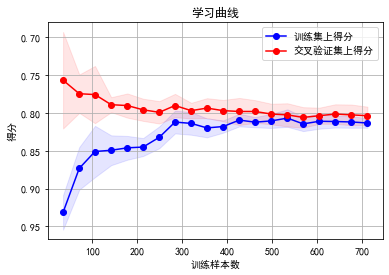

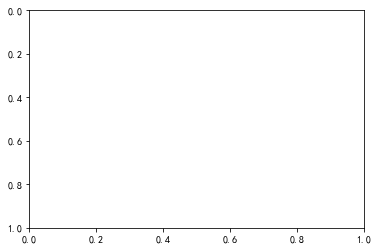

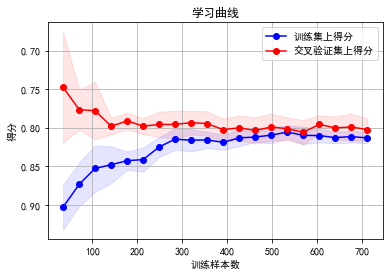

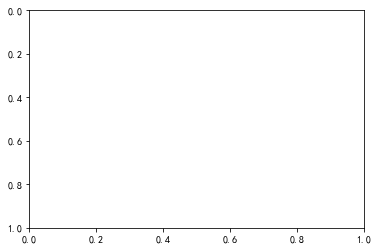

In [55]:
##绘制模型的learning_curve曲线
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    打印learning_curve
    :param estimator: 模型
    :param title: 图标的标题
    :param X: 训练集的训练特征数据
    :param y: 训练集的目标特征数据
    :param ylim: 设置纵坐标点最高和最低点
    :param cv: cv的k值
    :param n_jobs: 并行任务数
    :param train_sizes: 
    :param verbose:
    :param plot:
    """
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,verbose=verbose
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()    #将y轴的位置设置在左边
        plt.grid()      #设置网格

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                     alpha=0.1, color="b")      #均值范围内加颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                     alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")

    plt.legend(loc="best")

    plt.draw()
    plt.show()
    plt.gca().invert_yaxis()

    #训练模型的train和test的差异
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])


    return midpoint, diff
#打印learning_curve
midpoint, diff = plot_learning_curve(clf, u"学习曲线", data_train_filter_np[:, 1:], data_train_filter_np[:, 0])
midpoint, diff = plot_learning_curve(bagging_clf, u"学习曲线", data_train_filter_np[:, 1:], data_train_filter_np[:, 0])